# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40802.40
The current value of your 5.3 ETH is $9494.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [8]:
# Format current date as ISO format

today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investment = pd.concat([AGG, SPY],axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_investment.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-05-01 04:00:00+00:00  116.87  117.0998  116.6775       24394  116.97   
2020-05-04 04:00:00+00:00  116.97  117.0900  116.8700       15546  116.89   
2020-05-05 04:00:00+00:00  116.88  116.9700  116.8100       15147  116.96   
2020-05-06 04:00:00+00:00  116.41  116.7100  116.3000       20234  116.44   
2020-05-07 04:00:00+00:00  116.77  116.7700  116.4200       15964  116.61   

                                                   SPY                      \
                            volume        vwap   close      high       low   
timestamp                                                                    
2020-05-01 04:00:00+00:00  6331654  116.846992  282.83  290.6572  281.5200   
2020-05-04 04:00:00+00:00  3803239  116.960894  283.59  283.9000  279.1300   
2020-05-05 04:00:00+00:00  5593693  116.879703  286.15  289.2500  283.7134   
2020-05-06 04:00:00+00:00  7832788  116.423669  284.34  288.4600  283.7800   
2020-05-07 04:00:00+00:00  3914327  116.646007  287.70  289.7800  287.1300   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00      639155  285.31  127002350  284.074074  
2020-05-04 04:00:00+00:00      460683  280.74   81813464  281.785875  
2020-05-05 04:00:00+00:00      459766  286.64   80363726  287.388247  
2020-05-06 04:00:00+00:00      436221  288.04   74268760  286.080459  
2020-05-07 04:00:00+00:00      422689  287.75   75995625  287.986917

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investment['AGG']['close'][0])
spy_close_price = float(df_investment['SPY']['close'][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price 
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'share'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,50296.714
share,37515.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

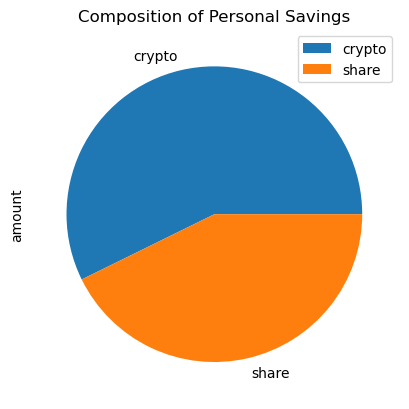

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congrat! You have enough funds")
elif total_savings == emergency_fund: 
    print("Congrats! You have reached your savings goal. Keep going! ")
else:
    print(f'You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal. Continue saving to reach your goal.')

Congrat! You have enough funds


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2018-10-01 04:00:00+00:00  105.24  105.3500  105.2000       10736  105.35   
2018-10-02 04:00:00+00:00  105.36  105.4600  105.2500       17111  105.32   
2018-10-03 04:00:00+00:00  104.86  105.2400  104.7500       12195  105.22   
2018-10-04 04:00:00+00:00  104.56  104.7171  104.4701       14129  104.65   
2018-10-05 04:00:00+00:00  104.33  104.4800  104.1900       15197  104.46   

                                                   SPY                   \
                            volume        vwap   close     high     low   
timestamp                                                                 
2018-10-01 04:00:00+00:00  4029157  105.261557  291.70  292.930  290.98   
2018-10-02 04:00:00+00:00  7661143  105.382539  291.61  292.355  291.14   
2018-10-03 04:00:00+00:00  2621032  104.984522  291.76  293.210  291.32   
2018-10-04 04:00:00+00:00  5701237  104.562484  289.53  291.240  287.66   
2018-10-05 04:00:00+00:00  3601223  104.324140  287.81  290.270  286.22   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-10-01 04:00:00+00:00      254455  292.11   63634059  291.953301  
2018-10-02 04:00:00+00:00      220334  291.56   49096939  291.704281  
2018-10-03 04:00:00+00:00      258734  292.74   66022129  292.243188  
2018-10-04 04:00:00+00:00      478293  291.18  113147728  289.453058  
2018-10-05 04:00:00+00:00      466829  289.69  108781268  288.108333

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
future_shares_df = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
future_shares_df.portfolio_data.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2018-10-01 04:00:00+00:00  105.24  105.3500  105.2000       10736  105.35   
2018-10-02 04:00:00+00:00  105.36  105.4600  105.2500       17111  105.32   
2018-10-03 04:00:00+00:00  104.86  105.2400  104.7500       12195  105.22   
2018-10-04 04:00:00+00:00  104.56  104.7171  104.4701       14129  104.65   
2018-10-05 04:00:00+00:00  104.33  104.4800  104.1900       15197  104.46   

                                                                SPY           \
                            volume        vwap daily_return   close     high   
timestamp                                                                      
2018-10-01 04:00:00+00:00  4029157  105.261557          NaN  291.70  292.930   
2018-10-02 04:00:00+00:00  7661143  105.382539     0.001140  291.61  292.355   
2018-10-03 04:00:00+00:00  2621032  104.984522    -0.004746  291.76  293.210   
2018-10-04 04:00:00+00:00  5701237  104.562484    -0.002861  289.53  291.240   
2018-10-05 04:00:00+00:00  3601223  104.324140    -0.002200  287.81  290.270   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-10-01 04:00:00+00:00  290.98      254455  292.11   63634059  291.953301   
2018-10-02 04:00:00+00:00  291.14      220334  291.56   49096939  291.704281   
2018-10-03 04:00:00+00:00  291.32      258734  292.74   66022129  292.243188   
2018-10-04 04:00:00+00:00  287.66      478293  291.18  113147728  289.453058   
2018-10-05 04:00:00+00:00  286.22      466829  289.69  108781268  288.108333   

                                        
                          daily_return  
timestamp                               
2018-10-01 04:00:00+00:00          NaN  
2018-10-02 04:00:00+00:00    -0.000309  
2018-10-03 04:00:00+00:00     0.000514  
2018-10-04 04:00:00+00:00    -0.007643  
2018-10-05 04:00:00+00:00    -0.005941

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
future_shares_df.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004857,0.995024,1.004322,0.986561,1.006840,0.993908,0.999870,0.998812,0.996697,0.992278,...,0.996910,1.010407,1.001117,0.999850,1.011273,0.995817,0.996784,1.005122,0.993317,1.010872
2,1.004164,1.003004,1.028131,0.987342,1.009121,1.001917,0.997622,1.006987,1.000410,0.980977,...,0.997479,1.011461,1.004412,0.998686,1.006055,0.984714,0.988215,1.005271,1.002058,1.010441
3,1.006567,1.004893,1.031094,0.976648,1.021876,0.992326,1.005188,0.990768,0.997115,0.985180,...,1.006298,1.010171,1.005400,0.993479,0.993970,1.004110,0.984124,0.996395,1.004328,0.998852
4,1.018458,1.000888,1.037028,0.969205,1.013693,0.980288,1.022485,0.979150,0.988361,0.986758,...,1.008506,1.018315,1.006612,0.991023,0.994963,0.989492,0.977910,0.990575,1.022521,1.009495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.647145,3.080936,6.975158,2.221586,2.386370,4.063713,2.688786,3.612050,2.729244,1.822737,...,5.258422,7.442751,1.480399,2.331929,3.004201,2.996537,2.178630,4.509892,5.400362,4.365215
7557,4.624757,3.096135,6.989303,2.228646,2.385275,4.105344,2.678853,3.599718,2.742820,1.827690,...,5.309614,7.581821,1.494805,2.345447,2.992538,2.998612,2.207846,4.533033,5.480651,4.432599
7558,4.610884,3.108462,7.108630,2.212261,2.410952,4.067618,2.650177,3.610079,2.787842,1.812778,...,5.321535,7.686099,1.493652,2.351334,3.031087,2.972465,2.220721,4.462572,5.426514,4.455990
7559,4.637662,3.124837,7.086707,2.220548,2.407708,4.065832,2.665248,3.617321,2.802012,1.811768,...,5.281563,7.800262,1.497759,2.355317,3.018301,3.001238,2.208488,4.435447,5.379978,4.452445


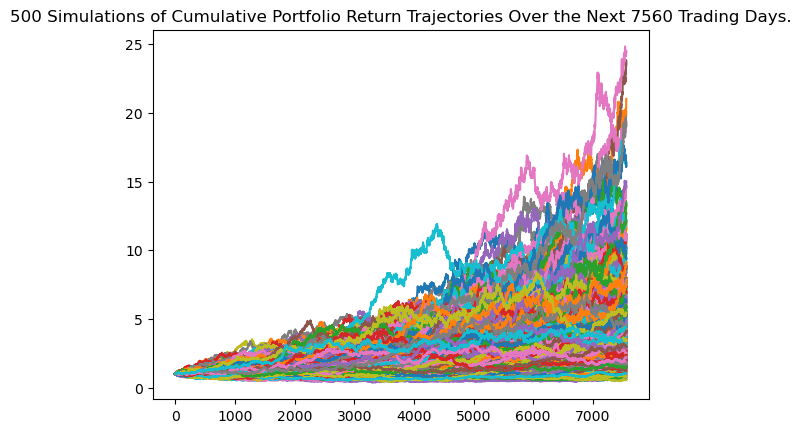

In [19]:
# Plot simulation outcomes
line_plot = future_shares_df.plot_simulation()

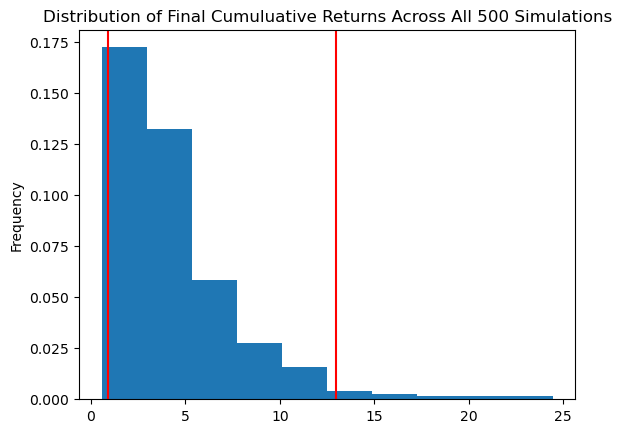

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = future_shares_df.plot_distribution()

### Retirement Analysis

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
#Putting results in dataframe for future commands

future_shares_df = pd.DataFrame(future_shares_df.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results

stats = future_shares_df.iloc[-1].describe()

print(stats
     )
#tbl = stats = future_shares_df.iloc[-1].describe()
#print(stats).summarize_cumulative_return()

# Print summary statistics
#print(tbl)

count    500.000000
mean       4.542055
std        3.806391
min        0.741982
25%        2.295552
50%        3.467411
75%        5.465892
max       31.771667
Name: 7560, dtype: float64


In [23]:
#Calculating for cilower and ciupper

ci_lower_original =stats.quantile(0.05)
ci_upper_original =stats.quantile(0.95)

#Printing the results
print(ci_lower_original)
print(ci_upper_original)

1.2857317369342822
336.12008359659353


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = stats * initial_investment, 2
ci_upper = stats * initial_investment, 2

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_original} and ${ci_upper_original}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $(count    1.000000e+07
mean     9.084110e+04
std      7.612782e+04
min      1.483964e+04
25%      4.591105e+04
50%      6.934821e+04
75%      1.093178e+05
max      6.354333e+05
Name: 7560, dtype: float64, 2) and $(count    1.000000e+07
mean     9.084110e+04
std      7.612782e+04
min      1.483964e+04
25%      4.591105e+04
50%      6.934821e+04
75%      1.093178e+05
max      6.354333e+05
Name: 7560, dtype: float64, 2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = stats * initial_investment, 2
ci_upper = stats * initial_investment, 2


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $(count    1.500000e+07
mean     1.362617e+05
std      1.141917e+05
min      2.225947e+04
25%      6.886657e+04
50%      1.040223e+05
75%      1.639768e+05
max      9.531500e+05
Name: 7560, dtype: float64, 2) and $(count    1.500000e+07
mean     1.362617e+05
std      1.141917e+05
min      2.225947e+04
25%      6.886657e+04
50%      1.040223e+05
75%      1.639768e+05
max      9.531500e+05
Name: 7560, dtype: float64, 2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns


In [ ]:
# Plot simulation outcomes


In [ ]:
# Plot probability distribution and confidence intervals


In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results


# Print summary statistics


In [ ]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns


In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns


In [ ]:
# Plot simulation outcomes


In [ ]:
# Plot probability distribution and confidence intervals


In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results

# Print summary statistics


In [ ]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")